## What I Learnt

1. 学习使用了PyTorch的卷积层
    - 卷积层需要输入4维，批次+通道+长+宽
2. 知道如何输出卷积层的weight
3. **未实现**使用自定义的卷积核，实现卷积操作

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import cv2
from skimage.transform import resize
from skimage.exposure import histogram, equalize_hist, equalize_adapthist
import warnings

In [2]:
input_image = cv2.imread('./data/Data/train/NORMAL/IM-0143-0001.jpeg')

In [3]:
input_image.shape

(1928, 2138, 3)

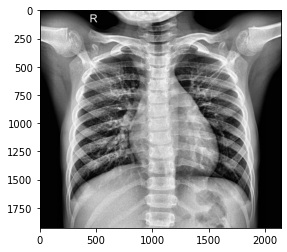

In [4]:
input_image = equalize_adapthist(input_image)
plt.imshow(input_image)

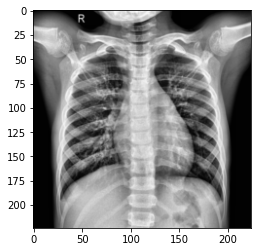

In [5]:
input_image = resize(input_image, (224, 224, 3))
plt.imshow(input_image)

In [6]:
input_image = input_image.transpose(2, 0, 1)
input_image.shape

(3, 224, 224)

In [7]:
input_image = torch.from_numpy(input_image)
input_image = input_image.unsqueeze(0)
# input_image = input_image.unsqueeze(0).unsqueeze(0)

In [8]:
input_image = input_image.to(dtype=torch.float)

In [9]:
input_image.shape

torch.Size([1, 3, 224, 224])

## 1. PyTorch卷积层

In [10]:
conv = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)

In [11]:
output = conv(input_image)

In [12]:
print(output.shape)

torch.Size([1, 3, 224, 224])


In [13]:
output

tensor([[[[0.1491, 0.1642, 0.1680,  ..., 0.1865, 0.1858, 0.1733],
          [0.1539, 0.1858, 0.1892,  ..., 0.2082, 0.2064, 0.1844],
          [0.1521, 0.2003, 0.2057,  ..., 0.2257, 0.2256, 0.1960],
          ...,
          [0.1431, 0.1495, 0.1495,  ..., 0.1502, 0.1514, 0.1453],
          [0.1431, 0.1495, 0.1495,  ..., 0.1499, 0.1496, 0.1434],
          [0.1408, 0.1435, 0.1435,  ..., 0.1438, 0.1439, 0.1408]],

         [[0.1428, 0.1466, 0.1496,  ..., 0.1576, 0.1573, 0.1593],
          [0.1556, 0.1569, 0.1609,  ..., 0.1739, 0.1722, 0.1776],
          [0.1577, 0.1685, 0.1755,  ..., 0.1882, 0.1873, 0.1957],
          ...,
          [0.1337, 0.1356, 0.1356,  ..., 0.1350, 0.1342, 0.1423],
          [0.1337, 0.1356, 0.1356,  ..., 0.1345, 0.1325, 0.1398],
          [0.1290, 0.1321, 0.1321,  ..., 0.1319, 0.1315, 0.1363]],

         [[0.0712, 0.0768, 0.0794,  ..., 0.0906, 0.0905, 0.0870],
          [0.0846, 0.0921, 0.0971,  ..., 0.1165, 0.1167, 0.1126],
          [0.0943, 0.1116, 0.1212,  ..., 0

In [14]:
img = output.detach().numpy()

In [15]:
img.shape

(1, 3, 224, 224)

In [16]:
img = img.transpose(0, 2, 3, 1)

In [17]:
img.shape

(1, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


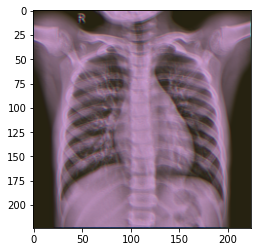

In [18]:
plt.imshow(img[0])

In [19]:
img = np.clip(img, 0, 1)

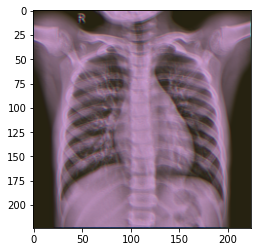

In [20]:
plt.imshow(img[0])

In [21]:
conv.weight[0]

tensor([[[-0.0624, -0.1567,  0.1708],
         [ 0.1222, -0.1760, -0.0920],
         [ 0.0894,  0.0970,  0.1792]],

        [[ 0.0895, -0.0148, -0.1324],
         [ 0.0964,  0.1013, -0.0981],
         [ 0.1475, -0.0082, -0.0420]],

        [[ 0.1852, -0.0334,  0.0642],
         [-0.1032, -0.1372,  0.1611],
         [ 0.1917, -0.0117,  0.0635]]], grad_fn=<SelectBackward>)

## 2. 自定义卷积核

In [22]:
# 定义 3x3x3 的卷积核
kernel = np.array([[[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]],
                   [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]],
                   [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]])
kernel.shape

(3, 3, 3)

In [23]:
# 转换为 PyTorch 的 tensor
kernel = torch.from_numpy(kernel)

In [24]:
kernel.shape

torch.Size([3, 3, 3])

In [25]:
# 定义卷积层，使用自定义的卷积核
conv = nn.Conv3d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1, bias=True)
# 创建3x3x3的权重矩阵，并将其赋值给卷积核的weight属性
conv.weight = nn.Parameter(torch.tensor(
    [[[1, 2, 3], [4, 5, 6], [7, 8, 9]],
     [[10, 11, 12], [13, 14, 15], [16, 17, 18]],
     [[19, 20, 21], [22, 23, 24], [25, 26, 27]]], dtype=torch.float32))

In [26]:
conv.weight.shape

torch.Size([3, 3, 3])

In [27]:
input_image.shape

torch.Size([1, 3, 224, 224])

In [28]:
# 使用卷积层进行卷积操作
output = conv(input_image)

RuntimeError: expected stride to be a single integer value or a list of 1 values to match the convolution dimensions, but got stride=[1, 1, 1]